### Linear Regression Model

Importing required packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("data/cleaned_data.csv")
df.head()

,DEPSTN,ARRSTN,AC_TYPE,target,flight_duration,month,dayparts,hour_bucket,expected_delay
0,CMN,TUN,32A,260.0,145.0,Jan,Morning,h10,46.3
1,MXP,TUN,31B,20.0,110.0,Jan,Afternoon,h15,60.8
2,TUN,IST,32A,0.0,155.0,Jan,Night,h04,28.9
3,DJE,NTE,736,0.0,170.0,Jan,Afternoon,h14,57.9
4,TUN,ALG,320,22.0,80.0,Jan,Afternoon,h14,57.9


In [2]:
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify numerical and categorical features
numeric_features = ["flight_duration", "expected_delay"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket"]

# Create preprocessing pipelines for both types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 121.20


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


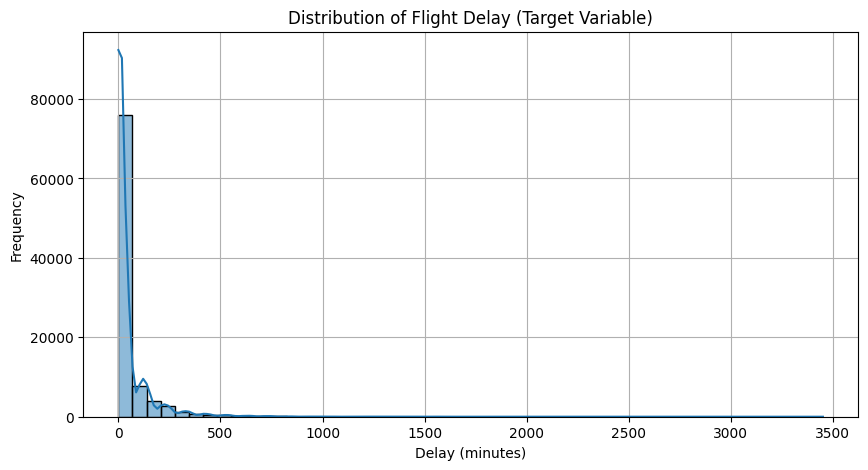

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(df["target"], bins=50, kde=True)
plt.title("Distribution of Flight Delay (Target Variable)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Define and Remove outliers

In [4]:
df["target"].describe()

count    93679.000000
mean        55.655099
std        123.262956
min          0.000000
25%          0.000000
50%         19.000000
75%         50.000000
max       3451.000000
Name: target, dtype: float64

In [5]:
# Count the number of flights with delay greater than 480 minutes
outlier_count = df[df["target"] > 480].shape[0]

# Total number of records in the dataset
total_count = df.shape[0]

# Calculate the percentage of outliers
percentage = (outlier_count / total_count) * 100

# Print the results
print(f"Number of flights with delay over 480 minutes: {outlier_count}")
print(f"Percentage of such flights in dataset: {percentage:.2f}%")

Number of flights with delay over 480 minutes: 1224
Percentage of such flights in dataset: 1.31%


In [6]:
# Remove outliers: flights with delay > 480 minutes
df = df[df["target"] <= 480]

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify numerical and categorical features
numeric_features = ["flight_duration", "expected_delay"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket"]

# Create preprocessing pipelines for both types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) after outlier removal: {rmse:.2f}")

Root Mean Squared Error (RMSE) after outlier removal: 70.96


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


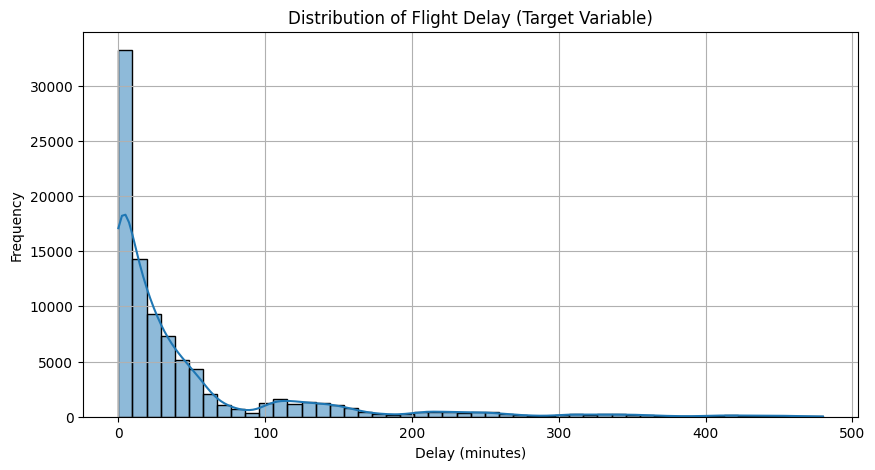

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df["target"], bins=50, kde=True)
plt.title("Distribution of Flight Delay (Target Variable)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Feature Engineering (Create new feature: route)

In [8]:
# Create new feature: route
df["route"] = df["DEPSTN"] + "_" + df["ARRSTN"]

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Define feature types
numeric_features = ["flight_duration", "expected_delay"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket", "route"]

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Create pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict & evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE after route feature + outlier removal: {rmse:.2f}")

RMSE after route feature + outlier removal: 71.09


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Feature Engineering (Create new feature: airport performance)

In [9]:
# Create airport performance features
top10_dep = ["CZL", "NKC", "DSS", "BKO", "JED", "IST", "CKY", "DKR", "ORN", "CDG"]
bottom10_dep = ["NBE", "BEY", "DJE", "PMO", "NDR", "OUD", "GAE", "MLA", "NAP", "GAF"]
top10_arr = ["NKC", "IST", "BKO", "CZL", "CDG", "CKY", "MED", "JED", "DKR", "NIM"]
bottom10_arr = ["DUS", "FRA", "BRU", "LGW", "BUD", "MLA", "PMO", "GAE", "GAF", "NAP"]

df["dep_perf"] = "mid"
df.loc[df["DEPSTN"].isin(top10_dep), "dep_perf"] = "high"
df.loc[df["DEPSTN"].isin(bottom10_dep), "dep_perf"] = "low"

df["arr_perf"] = "mid"
df.loc[df["ARRSTN"].isin(top10_arr), "arr_perf"] = "high"
df.loc[df["ARRSTN"].isin(bottom10_arr), "arr_perf"] = "low"

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Define feature types
numeric_features = ["flight_duration", "expected_delay"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket", "route", "dep_perf", "arr_perf"]

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Model pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict & evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE after airport performance + outlier removal: {rmse:.2f}")


RMSE after airport performance + outlier removal: 71.10


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Feature Engineering Data-driven Airport Performance Features

In [10]:
# Create new numeric features from actual average delays
dep_delay_map = df.groupby("DEPSTN")["target"].mean()
arr_delay_map = df.groupby("ARRSTN")["target"].mean()

df["dep_perf_score"] = df["DEPSTN"].map(dep_delay_map)
df["arr_perf_score"] = df["ARRSTN"].map(arr_delay_map)

In [11]:
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify feature types
numeric_features = ["flight_duration", "expected_delay", "dep_perf_score", "arr_perf_score"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket", "route"]

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Create pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit and evaluate
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE with data-driven airport performance features: {rmse:.2f}")

RMSE with data-driven airport performance features: 70.92


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Interaction Features

In [12]:
# Create airport performance scores
dep_delay_map = df.groupby("DEPSTN")["target"].mean()
arr_delay_map = df.groupby("ARRSTN")["target"].mean()
df["dep_perf_score"] = df["DEPSTN"].map(dep_delay_map)
df["arr_perf_score"] = df["ARRSTN"].map(arr_delay_map)

# Create interaction features
df["route_delay_score"] = df["dep_perf_score"] + df["arr_perf_score"]
df["duration_performance"] = df["flight_duration"] * df["dep_perf_score"]

# Now create X and y
X = df.drop("target", axis=1)
y = df["target"]

In [13]:
# Define new numeric features including interactions
numeric_features = [
    "flight_duration",
    "expected_delay",
    "dep_perf_score",
    "arr_perf_score",
    "route_delay_score",
    "duration_performance"
]

categorical_features = [
    "DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket", "route"
]

# Define preprocessing transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine preprocessing into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [14]:
# Create pipeline with preprocessing and Linear Regression
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final RMSE with interaction features: {rmse:.2f}")

Final RMSE with interaction features: 70.92


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Target Encoding

In [15]:
# Compute the mean delay per category (Target Encoding)
route_enc_map = df.groupby("route")["target"].mean()
dep_enc_map = df.groupby("DEPSTN")["target"].mean()
arr_enc_map = df.groupby("ARRSTN")["target"].mean()

# Map the encoded values back to the dataframe
df["route_enc"] = df["route"].map(route_enc_map)
df["dep_enc"] = df["DEPSTN"].map(dep_enc_map)
df["arr_enc"] = df["ARRSTN"].map(arr_enc_map)

# Define numerical and categorical features
numeric_features = [
    "flight_duration",
    "expected_delay",
    "dep_enc",
    "arr_enc",
    "route_enc"
]

categorical_features = [
    "AC_TYPE", "month", "dayparts", "hour_bucket"
]

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train
model_pipeline.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE with target encoding: {rmse:.2f}")

RMSE with target encoding: 70.65


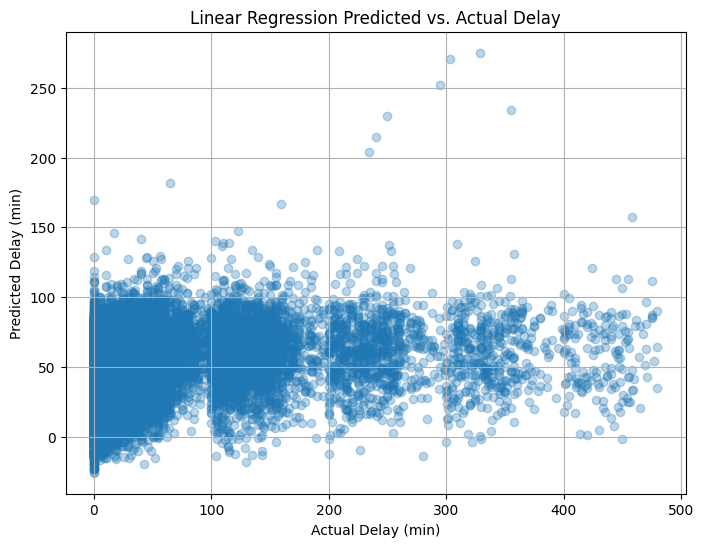

In [16]:
# 1. Predicted vs. Actual Delay
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Linear Regression Predicted vs. Actual Delay")
plt.grid(True)
plt.show()

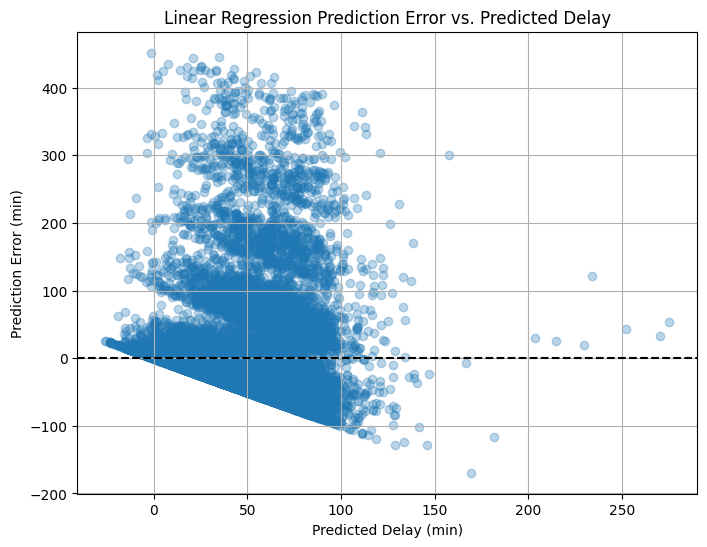

In [17]:
# 2. Prediction Error vs. Predicted Delay
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, errors, alpha=0.3)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Delay (min)")
plt.ylabel("Prediction Error (min)")
plt.title("Linear Regression Prediction Error vs. Predicted Delay")
plt.grid(True)
plt.show()

Simplify High Cardinality Categorical Variables

In [20]:
# Simplify the 'route' feature to reduce cardinality
top_routes = df["route"].value_counts().nlargest(20).index
df["route_simplified"] = df["route"].where(df["route"].isin(top_routes), "other")

# Define numeric and categorical features
numeric_features = [
    "flight_duration", "expected_delay", "dep_perf_score", 
    "arr_perf_score", "route_delay_score", "duration_performance"
]

categorical_features = [
    "DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts",
    "hour_bucket", "route_simplified"  # Use simplified route
]

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train-test split
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE after route simplification + outlier removal: {rmse:.2f}")

RMSE after route simplification + outlier removal: 71.00


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### segment-based modeling

In [21]:
# Load dataset
df = pd.read_csv("data/cleaned_data.csv")

# Segment definitions based on delay duration
df_no_delay = df[df["target"] == 0]
df_short_delay = df[(df["target"] > 0) & (df["target"] <= 15)]
df_moderate_delay = df[(df["target"] > 15) & (df["target"] <= 60)]
df_long_delay = df[(df["target"] > 60) & (df["target"] <= 480)]
df_extreme_delay = df[df["target"] > 480]

# Check number of samples in each segment
print(f"No Delay (0 min): {len(df_no_delay)} rows")
print(f"Short Delay (0–15 min): {len(df_short_delay)} rows")
print(f"Moderate Delay (15–60 min): {len(df_moderate_delay)} rows")
print(f"Long Delay (60–480 min): {len(df_long_delay)} rows")
print(f"Extreme Delay (>480 min): {len(df_extreme_delay)} rows")

No Delay (0 min): 24468 rows
Short Delay (0–15 min): 19197 rows
Moderate Delay (15–60 min): 30882 rows
Long Delay (60–480 min): 17908 rows
Extreme Delay (>480 min): 1224 rows


In [22]:
def train_and_evaluate(df_segment):
    # Separate features and target
    X = df_segment.drop("target", axis=1)
    y = df_segment["target"]

    # Identify feature types
    numeric_features = ["flight_duration", "expected_delay"]
    categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket"]

    # Define transformers
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

    # Combine transformers into a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    # Define model pipeline
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train and evaluate
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse

In [23]:
rmse_0_15 = train_and_evaluate(df_short_delay)
print(f"RMSE (0–15 min): {rmse_0_15:.2f}")

rmse_15_60 = train_and_evaluate(df_moderate_delay)
print(f"RMSE (15–60 min): {rmse_15_60:.2f}")

rmse_60_480 = train_and_evaluate(df_long_delay)
print(f"RMSE (60–480 min): {rmse_60_480:.2f}")

rmse_480_M = train_and_evaluate(df_extreme_delay)
print(f"RMSE (>480 min): {rmse_480_M:.2f}")

c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RMSE (0–15 min): 3.52
RMSE (15–60 min): 12.22
RMSE (60–480 min): 93.25
RMSE (>480 min): 388.30


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


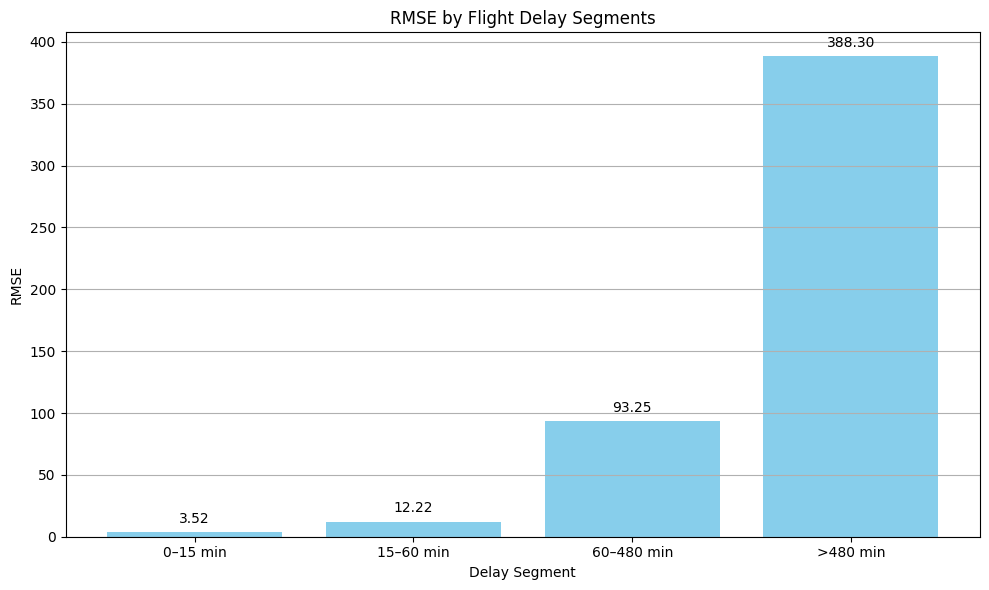

In [24]:
# RMSE values by delay segments
segments = ["0–15 min", "15–60 min", "60–480 min", ">480 min"]
rmse_values = [3.52, 12.22, 93.25, 388.30]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(segments, rmse_values, color='skyblue')

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.title("RMSE by Flight Delay Segments")
plt.xlabel("Delay Segment")
plt.ylabel("RMSE")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 📊 Model Performance Interpretation Based on RMSE Results

### 1. Baseline Model (All Data)
- **RMSE = 121.20**
- This result reflects the model's average prediction error across the full dataset. The high RMSE is mainly due to extreme values (outliers) in the target variable.

### 2. After Removing Outliers (> 480 min)
- **RMSE = 70.96**
- A major performance boost. By removing extremely delayed flights, the model focuses on more predictable cases, reducing overall error.

### 3. Feature Engineering Improvements

| Technique                                    | RMSE   | Comment                                                                 |
|---------------------------------------------|--------|-------------------------------------------------------------------------|
| + Route feature                              | 71.09  | Slight performance drop. Route alone may not carry strong signal.       |
| + Airport performance feature                | 71.10  | Similar to above, may introduce noise or weak correlation.              |
| + Data-driven airport performance features   | 70.92  | Slight improvement — better formulation of airport effects.             |
| + Interaction features                       | 70.92  | No change — possible weak interaction patterns in this dataset.         |
| + Target encoding                            | **70.65**  | ✅ Best result — captures hidden patterns in high-cardinality features. |
| + Simplified route encoding                  | 71.00  | Slight decrease — simplification may have removed useful variation.     |

### 4. Segment-Based Modeling

| Delay Segment     | RMSE    | Interpretation                                           |
|-------------------|---------|----------------------------------------------------------|
| 0–15 min          | 3.52    | Very low error — short delays are easier to model.       |
| 15–60 min         | 12.22   | Good performance — model captures moderate delays well.  |
| 60–480 min        | 93.25   | High error — harder to predict long delays.              |
| > 480 min         | 388.30  | Very high error — extreme delays are highly irregular.   |

---

### 🧠 General Insights

- Model performance **strongly improves** after removing outliers.
- **Target Encoding** was the most impactful feature engineering method.
- Other techniques led to **incremental gains**, highlighting the importance of selecting features with high predictive value.
- Segment-based modeling shows that **error increases with delay length**, which is expected due to increasing unpredictability.
- Outlier handling and careful feature design are **key levers** for improving model performance.


Distribution of Numerical Features

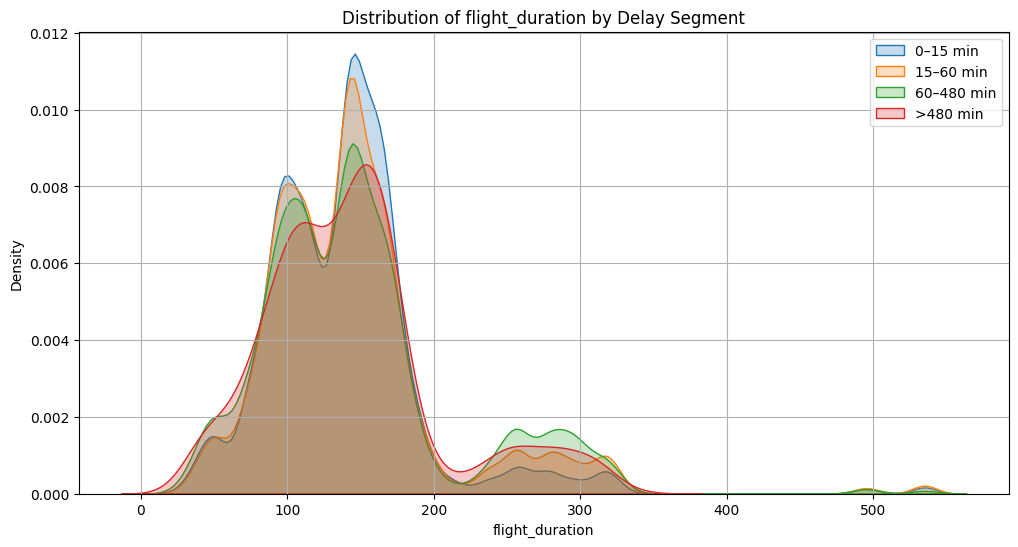

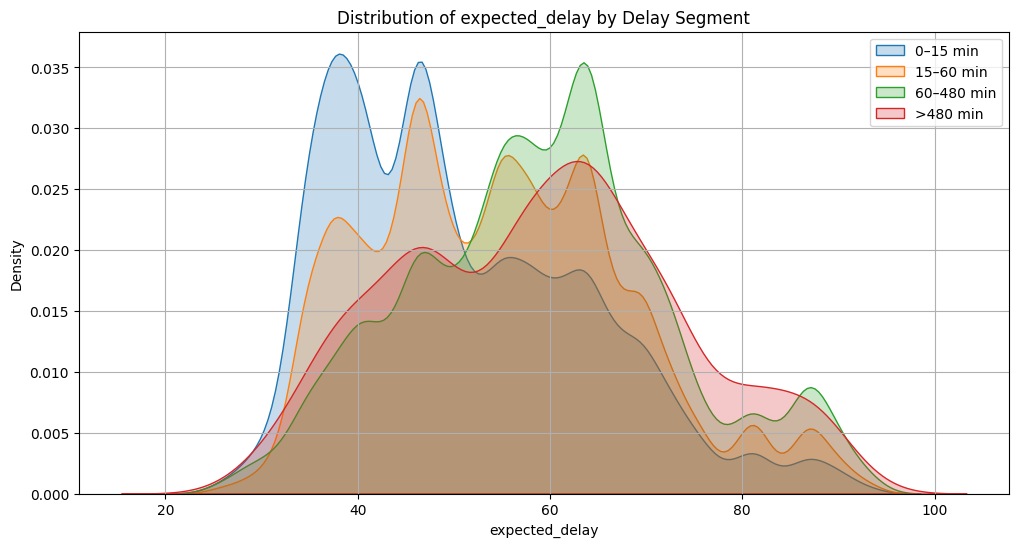

In [25]:
numerical_columns = ["flight_duration", "expected_delay"]

for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    for df_part, label in zip([df_short_delay, df_moderate_delay, df_long_delay, df_extreme_delay],
                              ["0–15 min", "15–60 min", "60–480 min", ">480 min"]):
        sns.kdeplot(df_part[col], label=label, fill=True)
    plt.title(f"Distribution of {col} by Delay Segment")
    plt.xlabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

Comparison of Numerical Features by Delay Segments

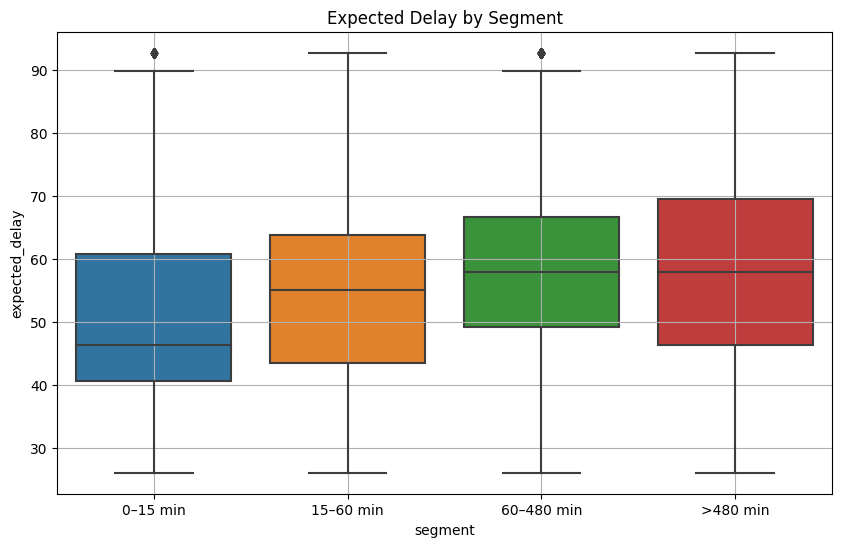

In [26]:
df_all = pd.concat([
    df_short_delay.assign(segment="0–15 min"),
    df_moderate_delay.assign(segment="15–60 min"),
    df_long_delay.assign(segment="60–480 min"),
    df_extreme_delay.assign(segment=">480 min")
])

plt.figure(figsize=(10, 6))
sns.boxplot(x="segment", y="expected_delay", data=df_all)
plt.title("Expected Delay by Segment")
plt.grid(True)
plt.show()

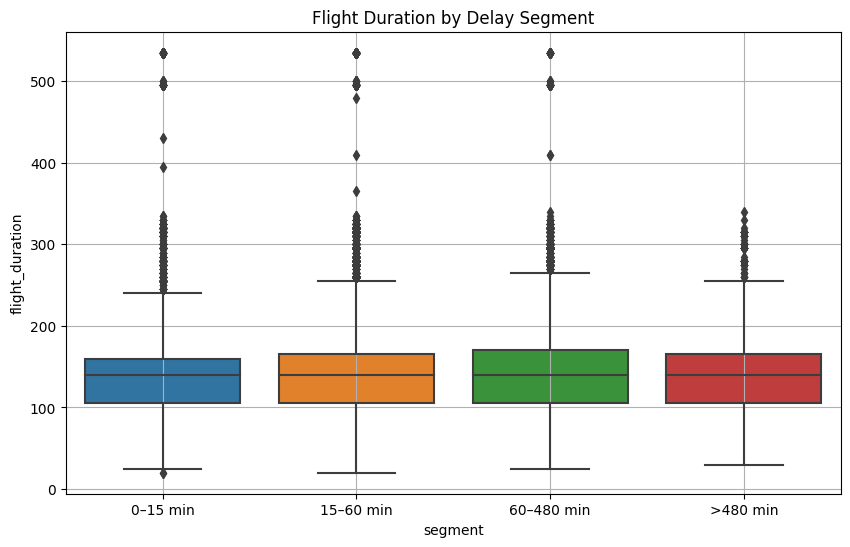

In [27]:
# Combine all delay segments and assign a new column called 'segment'
df_all = pd.concat([
    df_short_delay.assign(segment="0–15 min"),
    df_moderate_delay.assign(segment="15–60 min"),
    df_long_delay.assign(segment="60–480 min"),
    df_extreme_delay.assign(segment=">480 min")
])

# Create a boxplot to compare flight_duration across delay segments
plt.figure(figsize=(10, 6))
sns.boxplot(x="segment", y="flight_duration", data=df_all)
plt.title("Flight Duration by Delay Segment")
plt.grid(True)
plt.show()

Distribution of Categorical Variables by Segments

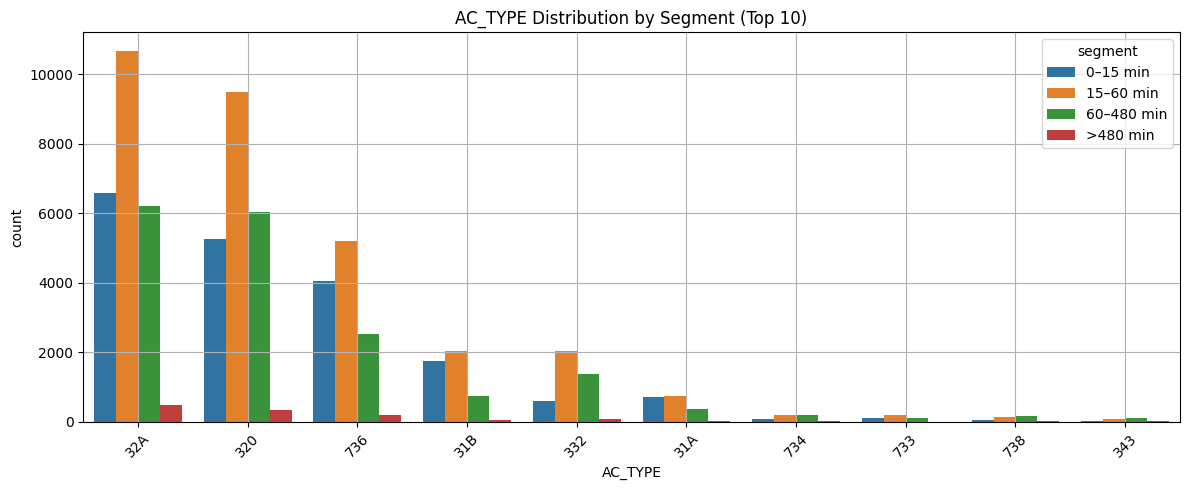

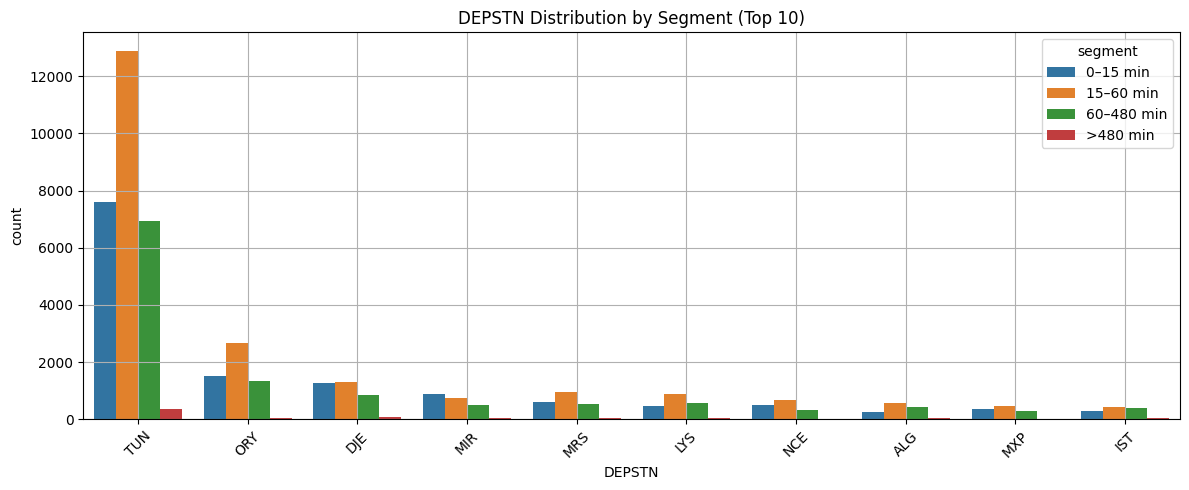

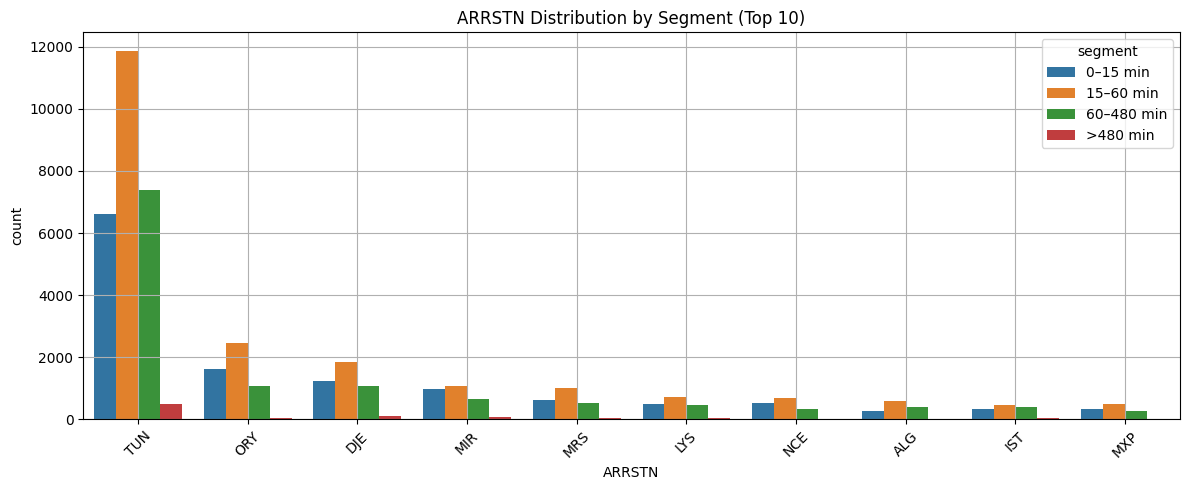

In [28]:
categorical_columns = ["AC_TYPE", "DEPSTN", "ARRSTN"]

for col in categorical_columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(
        data=df_all,
        x=col,
        hue="segment",
        order=df_all[col].value_counts().iloc[:10].index  # En sık geçen 10 kategori
    )
    plt.title(f"{col} Distribution by Segment (Top 10)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Correlation Heatmap (Segment Based)

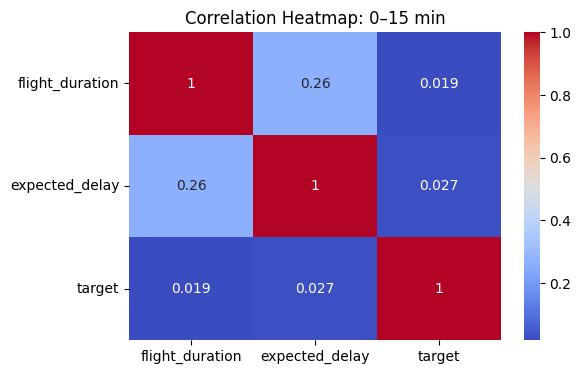

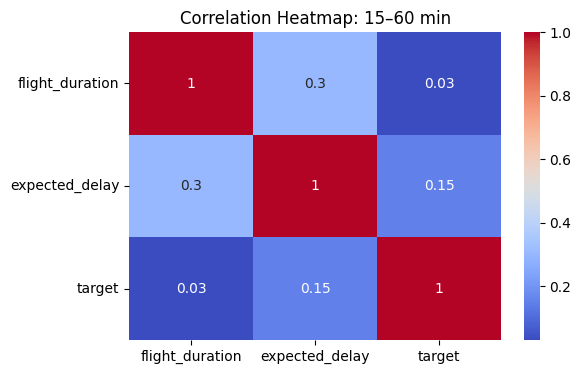

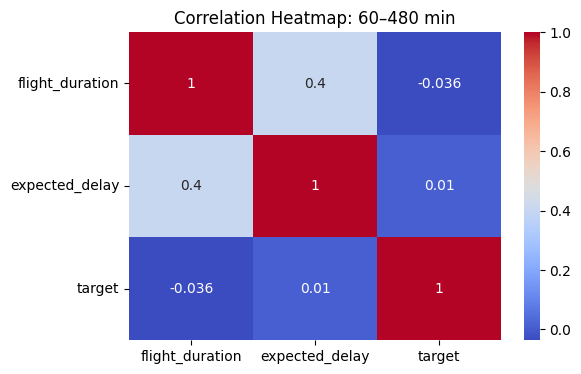

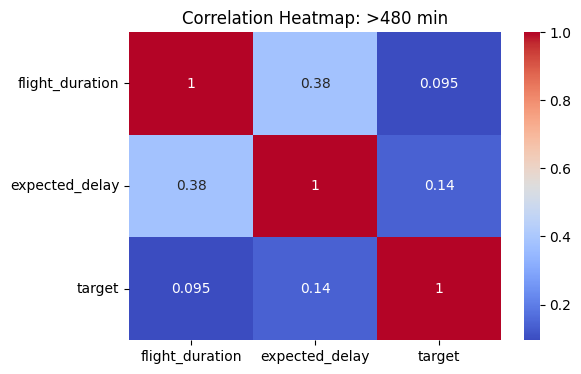

In [29]:
for df_part, name in zip([df_short_delay, df_moderate_delay, df_long_delay, df_extreme_delay],
                         ["0–15 min", "15–60 min", "60–480 min", ">480 min"]):
    plt.figure(figsize=(6, 4))
    corr = df_part[["flight_duration", "expected_delay", "target"]].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Heatmap: {name}")
    plt.show()

No segment shows a strong correlation (>|0.5|)  

expected_delay generally shows more correlation with target than with flight_duration.  

There is almost no signal, especially for short delays (0–15 min) → therefore, the model cannot make successful predictions.